<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Intro to Neural Networks


_Author:_ Tim Book

In [ ]:
# Install GPU version of tensorflow
# ! conda install tensorflow-gpu

# CPU version
# ! pip install tensorflow

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Dense == Fully Connected

In [2]:
# Making some fake data for illustration purposes.
# On your own time, try making this BIGGER!
X, y = make_classification(
    n_samples=100_000,
    n_features=200,
    n_informative=200,
    n_redundant=0,
    n_classes=10,
    random_state=42
)

In [3]:
y.shape

(100000,)

In [4]:
y

array([0, 8, 6, ..., 3, 9, 0])

In [5]:
y.reshape(-1, 1)

array([[0],
       [8],
       [6],
       ...,
       [3],
       [9],
       [0]])

In [6]:
# Since we're doing multiclass classification, we actually need to one-hot
# encode y to be an n-by-10 matrix. Keras doesn't know we're doing classification!
oh = OneHotEncoder(
    sparse=False,
    dtype=int,
    categories="auto"
)

y = oh.fit_transform(y.reshape(-1, 1))

In [7]:
X.shape

(100000, 200)

In [8]:
y.shape

(100000, 10)

In [9]:
y[:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [10]:
# Instantiate model
model = Sequential()

In [11]:
# One by one, add Dense layers to our model.
# "Dense" is another name for the "Fully Connected" layers we saw in the slides
# The hidden layers will use the ReLU activation
model.add(Dense(128, activation="relu", input_shape=(200,)))
model.add(Dense(64, activation="relu"))

# Output layer will have softmax
# The output layer should have the same number of nodes as the number of classes!
model.add(Dense(10, activation="softmax"))

In [13]:
# We need to compile our model in Keras.
# Need to tell it three things:
# Optimizer (for us, usually Adam)
# Loss (which?)
# Metrics (Definitely need accuracy, but could do more)

#opt = SGD(learning_rate=0.01)
opt = Adam(learning_rate=0.001)

model.compile(
    optimizer=opt,
    loss="categorical_crossentropy", # for multi-class classification
    metrics=["acc"]
)

In [16]:
80_000/32

2500.0

In [14]:
# Fit!
# Need to specify batch_size and epochs
# Can validate with validation_split
hist = model.fit(
    X, y,
    batch_size=32,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
2500/2500 [==============================] - 3s 1ms/step - loss: 1.7484 - acc: 0.4221 - val_loss: 1.0687 - val_acc: 0.6418
Epoch 2/10
2500/2500 [==============================] - 2s 994us/step - loss: 0.7471 - acc: 0.7526 - val_loss: 0.6539 - val_acc: 0.7897
Epoch 3/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4735 - acc: 0.8500 - val_loss: 0.5708 - val_acc: 0.8243
Epoch 4/10
2500/2500 [==============================] - 2s 984us/step - loss: 0.3698 - acc: 0.8846 - val_loss: 0.5183 - val_acc: 0.8434
Epoch 5/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.3092 - acc: 0.9045 - val_loss: 0.5038 - val_acc: 0.8556
Epoch 6/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2764 - acc: 0.9157 - val_loss: 0.5053 - val_acc: 0.8568
Epoch 7/10
2500/2500 [==============================] - 3s 1ms/step - loss: 0.2422 - acc: 0.9266 - val_loss: 0.5259 - val_acc: 0.8575
Epoch 8/10
2500/2500 [==============================] - 3s

In [21]:
hist.history

{'loss': [1.7483546733856201,
  0.7471375465393066,
  0.47346577048301697,
  0.36984753608703613,
  0.30924540758132935,
  0.27635815739631653,
  0.24223950505256653,
  0.22302958369255066,
  0.2061575949192047,
  0.19250477850437164],
 'acc': [0.4221374988555908,
  0.7526000142097473,
  0.8499749898910522,
  0.8845624923706055,
  0.9044749736785889,
  0.9156625270843506,
  0.9266374707221985,
  0.9329875111579895,
  0.9384499788284302,
  0.9413124918937683],
 'val_loss': [1.0687313079833984,
  0.6538534760475159,
  0.5707833766937256,
  0.5182701945304871,
  0.5037783980369568,
  0.5052664279937744,
  0.5259492993354797,
  0.49344101548194885,
  0.4880746006965637,
  0.5186255574226379],
 'val_acc': [0.6418499946594238,
  0.7897499799728394,
  0.8242999911308289,
  0.8434000015258789,
  0.8555999994277954,
  0.8567500114440918,
  0.8575000166893005,
  0.8683500289916992,
  0.8723000288009644,
  0.8676499724388123]}

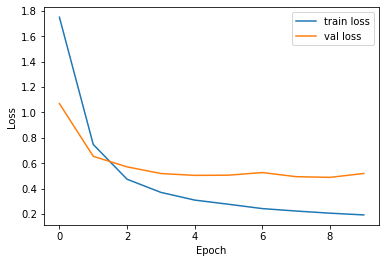

In [17]:
plt.plot(hist.epoch, hist.history['loss'], label='train loss')
plt.plot(hist.epoch, hist.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

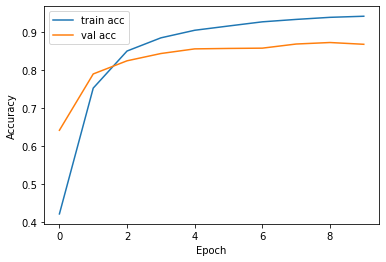

In [22]:
plt.plot(hist.epoch, hist.history['acc'], label='train acc')
plt.plot(hist.epoch, hist.history['val_acc'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();